### Import libraries

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

In [ ]:
# Import other libraries
import matplotlib.pyplot as plt

### Define the Perceptron model

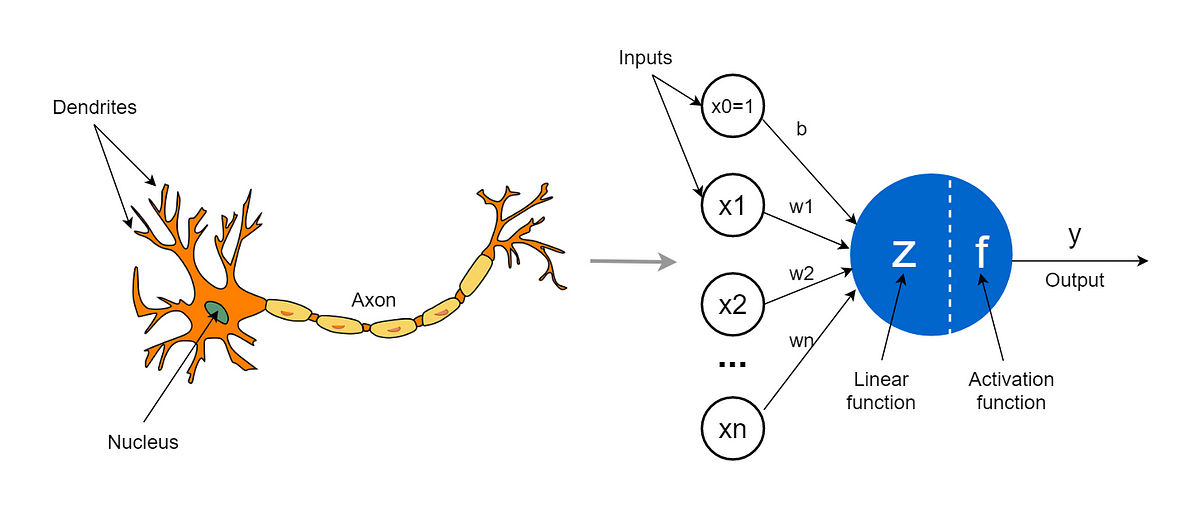

In [ ]:
def build_perceptron(
    input_shape,
    seed=seed
):
    # Fix randomness
    tf.random.set_seed(seed)

    # Build the model
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    output_layer = tfkl.Dense(units=1, name='Output')(input_layer)
    output_activation = tfkl.Activation('sigmoid', name='Sigmoid')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Perceptron')

    # Compile the model
    loss = tfk.losses.BinaryCrossentropy()
    learning_rate = 0.5
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

**Dense Layer**

The Dense Layer, also known as Fully Connected Layer, implements the operation:

*output = activation(dot(input, kernel) + bias)*

where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
```

tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```
**Activation Layer**

The Activation Layer applies an activation function to an output.
```
tf.keras.layers.Activation(
    activation, **kwargs
)
```
It is possible to combine the two layers in a more compact form.
```
# Build the model
input_layer = tfkl.Input(shape=input_shape, name='Input')
output_layer = tfkl.Dense(units=1, activation='sigmoid', name='Output')(input_layer)
# Connect input and output through the Model class
model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Perceptron')
```




### AND Problem

In [ ]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[0],[0],[1]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

In [ ]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [ ]:
batch_size = 4
epochs = 250

In [ ]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: AND Problem')
plt.show()

### OR Problem

In [ ]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[1],[1],[1]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

In [ ]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [ ]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: OR Problem')
plt.show()

### XOR Problem

In [ ]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[1],[1],[0]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

In [ ]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [ ]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: XOR Problem')
plt.show()

### Define the Multilayer Perceptron model

In [ ]:
def build_mlp(
    input_shape,
    seed=seed
):
    # Fix randomness
    tf.random.set_seed(seed)

    # Build the model
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=4, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='ReLU')(hidden_layer)

    output_layer = tfkl.Dense(units=1, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('sigmoid', name='Sigmoid')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='MLP')

    # Compile the model
    loss = tfk.losses.BinaryCrossentropy()
    learning_rate = 0.5
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

In [ ]:
mlp = build_mlp(input_shape)
mlp.summary()
tfk.utils.plot_model(mlp, show_shapes=True, expand_nested=True)

In [ ]:
history = mlp.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = mlp.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Multilayer Perceptron: XOR Problem')
plt.show()

*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*